# ResNet50 Based Architecture Model

### Imports

In [90]:
!pip install torchsummary

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import os
import glob
import csv
import pandas as pd
import traceback

os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [5]:
import torch
from torchvision import datasets, models, transforms
import torch.nn as nn
from torch.nn import functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from torchsummary import summary

data_dir = 'source_2/'
file_ext = '.png'
data_file = 'training_data.csv'
use_cpu = False

torch.__version__

'2.1.1'

### Create training log

In [6]:
log_dir = 'training_log.txt' # Log used for reporting issues with data loading
training_results_dir = './results'

if not os.path.exists(os.path.join(data_dir, log_dir)):
    with open(os.path.join(data_dir, log_dir), 'w') as f:
        f.close()
    
if not os.path.exists(training_results_dir):
    os.makedirs(training_results_dir)

### Generate dataset CSV

In [8]:
with open(data_file, 'w', newline="") as csv_file:
    csv_writer = csv.writer(csv_file, delimiter=",")
    for (root,dirs,files) in os.walk(data_dir, topdown=True):
        if len(root.split("/")[1]) == 0: # the root directory, no images here so skip
            continue
        label = root.split("/")[1] # sub-directory names are class labels

        for file in glob.glob(root + '/*' + file_ext):
            
            try: # check that image can be opened - add additional image requirement checks here
                img = Image.open(file).convert("L")
                im = np.asarray(img)
                csv_writer.writerow([file, label])
                print(file)
            except Exception as e:
                with open(os.path.join(data_dir, log_dir), 'a') as f:
                    f.write(str(e)+"\n")
#                 print(str(traceback.format_exc()))
            
    csv_file.close()

source_2/1\1_1.png
source_2/1\1_10.png
source_2/1\1_11.png
source_2/1\1_12.png
source_2/1\1_13.png
source_2/1\1_14.png
source_2/1\1_15.png
source_2/1\1_16.png
source_2/1\1_17.png
source_2/1\1_18.png
source_2/1\1_19.png
source_2/1\1_2.png
source_2/1\1_20.png
source_2/1\1_3.png
source_2/1\1_4.png
source_2/1\1_5.png
source_2/1\1_6.png
source_2/1\1_7.png
source_2/1\1_8.png
source_2/1\1_9.png
source_2/10\10_1.png
source_2/10\10_10.png
source_2/10\10_11.png
source_2/10\10_12.png
source_2/10\10_13.png
source_2/10\10_14.png
source_2/10\10_15.png
source_2/10\10_16.png
source_2/10\10_17.png
source_2/10\10_18.png
source_2/10\10_19.png
source_2/10\10_2.png
source_2/10\10_20.png
source_2/10\10_3.png
source_2/10\10_4.png
source_2/10\10_5.png
source_2/10\10_6.png
source_2/10\10_7.png
source_2/10\10_8.png
source_2/10\10_9.png
source_2/100\100_1.png
source_2/100\100_10.png
source_2/100\100_11.png
source_2/100\100_12.png
source_2/100\100_13.png
source_2/100\100_14.png
source_2/100\100_15.png
source_2/10

source_2/1019\1019_11.png
source_2/1019\1019_12.png
source_2/1019\1019_13.png
source_2/1019\1019_14.png
source_2/1019\1019_15.png
source_2/1019\1019_16.png
source_2/1019\1019_17.png
source_2/1019\1019_18.png
source_2/1019\1019_19.png
source_2/1019\1019_2.png
source_2/1019\1019_3.png
source_2/1019\1019_4.png
source_2/1019\1019_5.png
source_2/1019\1019_6.png
source_2/1019\1019_7.png
source_2/1019\1019_8.png
source_2/1019\1019_9.png
source_2/102\102_1.png
source_2/102\102_10.png
source_2/102\102_11.png
source_2/102\102_12.png
source_2/102\102_13.png
source_2/102\102_14.png
source_2/102\102_15.png
source_2/102\102_16.png
source_2/102\102_17.png
source_2/102\102_18.png
source_2/102\102_19.png
source_2/102\102_2.png
source_2/102\102_3.png
source_2/102\102_4.png
source_2/102\102_5.png
source_2/102\102_6.png
source_2/102\102_7.png
source_2/102\102_8.png
source_2/102\102_9.png
source_2/1020\1020_1.png
source_2/1020\1020_10.png
source_2/1020\1020_11.png
source_2/1020\1020_12.png
source_2/1020\10

source_2/1044\1044_1.png
source_2/1044\1044_10.png
source_2/1044\1044_11.png
source_2/1044\1044_12.png
source_2/1044\1044_13.png
source_2/1044\1044_14.png
source_2/1044\1044_15.png
source_2/1044\1044_16.png
source_2/1044\1044_17.png
source_2/1044\1044_18.png
source_2/1044\1044_19.png
source_2/1044\1044_2.png
source_2/1044\1044_3.png
source_2/1044\1044_4.png
source_2/1044\1044_5.png
source_2/1044\1044_6.png
source_2/1044\1044_7.png
source_2/1044\1044_8.png
source_2/1044\1044_9.png
source_2/1045\1045_1.png
source_2/1045\1045_10.png
source_2/1045\1045_11.png
source_2/1045\1045_12.png
source_2/1045\1045_13.png
source_2/1045\1045_14.png
source_2/1045\1045_15.png
source_2/1045\1045_16.png
source_2/1045\1045_17.png
source_2/1045\1045_18.png
source_2/1045\1045_19.png
source_2/1045\1045_2.png
source_2/1045\1045_3.png
source_2/1045\1045_4.png
source_2/1045\1045_5.png
source_2/1045\1045_6.png
source_2/1045\1045_7.png
source_2/1045\1045_8.png
source_2/1045\1045_9.png
source_2/1046\1046_1.png
sourc

source_2/1070\1070_4.png
source_2/1070\1070_5.png
source_2/1070\1070_6.png
source_2/1070\1070_7.png
source_2/1070\1070_8.png
source_2/1070\1070_9.png
source_2/1071\1071_1.png
source_2/1071\1071_10.png
source_2/1071\1071_11.png
source_2/1071\1071_12.png
source_2/1071\1071_13.png
source_2/1071\1071_14.png
source_2/1071\1071_15.png
source_2/1071\1071_16.png
source_2/1071\1071_17.png
source_2/1071\1071_18.png
source_2/1071\1071_19.png
source_2/1071\1071_2.png
source_2/1071\1071_3.png
source_2/1071\1071_4.png
source_2/1071\1071_5.png
source_2/1071\1071_6.png
source_2/1071\1071_7.png
source_2/1071\1071_8.png
source_2/1071\1071_9.png
source_2/1072\1072_1.png
source_2/1072\1072_10.png
source_2/1072\1072_11.png
source_2/1072\1072_12.png
source_2/1072\1072_13.png
source_2/1072\1072_14.png
source_2/1072\1072_15.png
source_2/1072\1072_16.png
source_2/1072\1072_17.png
source_2/1072\1072_18.png
source_2/1072\1072_19.png
source_2/1072\1072_2.png
source_2/1072\1072_3.png
source_2/1072\1072_4.png
sourc

source_2/128\128_18.png
source_2/128\128_19.png
source_2/128\128_2.png
source_2/128\128_3.png
source_2/128\128_4.png
source_2/128\128_5.png
source_2/128\128_6.png
source_2/128\128_7.png
source_2/128\128_8.png
source_2/128\128_9.png
source_2/129\129_1.png
source_2/129\129_10.png
source_2/129\129_11.png
source_2/129\129_12.png
source_2/129\129_13.png
source_2/129\129_14.png
source_2/129\129_15.png
source_2/129\129_16.png
source_2/129\129_17.png
source_2/129\129_18.png
source_2/129\129_19.png
source_2/129\129_2.png
source_2/129\129_3.png
source_2/129\129_4.png
source_2/129\129_5.png
source_2/129\129_6.png
source_2/129\129_7.png
source_2/129\129_8.png
source_2/129\129_9.png
source_2/13\13_1.png
source_2/13\13_10.png
source_2/13\13_11.png
source_2/13\13_12.png
source_2/13\13_13.png
source_2/13\13_14.png
source_2/13\13_15.png
source_2/13\13_16.png
source_2/13\13_17.png
source_2/13\13_18.png
source_2/13\13_19.png
source_2/13\13_2.png
source_2/13\13_20.png
source_2/13\13_3.png
source_2/13\13_4

source_2/153\153_2.png
source_2/153\153_3.png
source_2/153\153_4.png
source_2/153\153_5.png
source_2/153\153_6.png
source_2/153\153_7.png
source_2/153\153_8.png
source_2/153\153_9.png
source_2/154\154_1.png
source_2/154\154_10.png
source_2/154\154_11.png
source_2/154\154_12.png
source_2/154\154_13.png
source_2/154\154_14.png
source_2/154\154_15.png
source_2/154\154_16.png
source_2/154\154_17.png
source_2/154\154_18.png
source_2/154\154_19.png
source_2/154\154_2.png
source_2/154\154_3.png
source_2/154\154_4.png
source_2/154\154_5.png
source_2/154\154_6.png
source_2/154\154_7.png
source_2/154\154_8.png
source_2/154\154_9.png
source_2/155\155_1.png
source_2/155\155_10.png
source_2/155\155_11.png
source_2/155\155_12.png
source_2/155\155_13.png
source_2/155\155_14.png
source_2/155\155_15.png
source_2/155\155_16.png
source_2/155\155_17.png
source_2/155\155_18.png
source_2/155\155_19.png
source_2/155\155_2.png
source_2/155\155_3.png
source_2/155\155_4.png
source_2/155\155_5.png
source_2/155\1

source_2/18\18_13.png
source_2/18\18_14.png
source_2/18\18_15.png
source_2/18\18_16.png
source_2/18\18_17.png
source_2/18\18_18.png
source_2/18\18_19.png
source_2/18\18_2.png
source_2/18\18_3.png
source_2/18\18_4.png
source_2/18\18_5.png
source_2/18\18_6.png
source_2/18\18_7.png
source_2/18\18_8.png
source_2/18\18_9.png
source_2/180\180_1.png
source_2/180\180_10.png
source_2/180\180_11.png
source_2/180\180_12.png
source_2/180\180_13.png
source_2/180\180_14.png
source_2/180\180_15.png
source_2/180\180_16.png
source_2/180\180_17.png
source_2/180\180_18.png
source_2/180\180_19.png
source_2/180\180_2.png
source_2/180\180_3.png
source_2/180\180_4.png
source_2/180\180_5.png
source_2/180\180_6.png
source_2/180\180_7.png
source_2/180\180_8.png
source_2/180\180_9.png
source_2/181\181_1.png
source_2/181\181_10.png
source_2/181\181_11.png
source_2/181\181_12.png
source_2/181\181_13.png
source_2/181\181_14.png
source_2/181\181_15.png
source_2/181\181_16.png
source_2/181\181_17.png
source_2/181\181

source_2/204\204_16.png
source_2/204\204_17.png
source_2/204\204_18.png
source_2/204\204_19.png
source_2/204\204_2.png
source_2/204\204_3.png
source_2/204\204_4.png
source_2/204\204_5.png
source_2/204\204_6.png
source_2/204\204_7.png
source_2/204\204_8.png
source_2/204\204_9.png
source_2/205\205_1.png
source_2/205\205_10.png
source_2/205\205_11.png
source_2/205\205_12.png
source_2/205\205_13.png
source_2/205\205_14.png
source_2/205\205_15.png
source_2/205\205_16.png
source_2/205\205_17.png
source_2/205\205_18.png
source_2/205\205_19.png
source_2/205\205_2.png
source_2/205\205_3.png
source_2/205\205_4.png
source_2/205\205_5.png
source_2/205\205_6.png
source_2/205\205_7.png
source_2/205\205_8.png
source_2/205\205_9.png
source_2/206\206_1.png
source_2/206\206_10.png
source_2/206\206_11.png
source_2/206\206_12.png
source_2/206\206_13.png
source_2/206\206_14.png
source_2/206\206_15.png
source_2/206\206_16.png
source_2/206\206_17.png
source_2/206\206_18.png
source_2/206\206_19.png
source_2/2

source_2/231\231_18.png
source_2/231\231_19.png
source_2/231\231_2.png
source_2/231\231_3.png
source_2/231\231_4.png
source_2/231\231_5.png
source_2/231\231_6.png
source_2/231\231_7.png
source_2/231\231_8.png
source_2/231\231_9.png
source_2/232\232_1.png
source_2/232\232_10.png
source_2/232\232_11.png
source_2/232\232_12.png
source_2/232\232_13.png
source_2/232\232_14.png
source_2/232\232_15.png
source_2/232\232_16.png
source_2/232\232_17.png
source_2/232\232_18.png
source_2/232\232_19.png
source_2/232\232_2.png
source_2/232\232_3.png
source_2/232\232_4.png
source_2/232\232_5.png
source_2/232\232_6.png
source_2/232\232_7.png
source_2/232\232_8.png
source_2/232\232_9.png
source_2/233\233_1.png
source_2/233\233_10.png
source_2/233\233_11.png
source_2/233\233_12.png
source_2/233\233_13.png
source_2/233\233_14.png
source_2/233\233_15.png
source_2/233\233_16.png
source_2/233\233_17.png
source_2/233\233_18.png
source_2/233\233_19.png
source_2/233\233_2.png
source_2/233\233_3.png
source_2/233

source_2/257\257_18.png
source_2/257\257_19.png
source_2/257\257_2.png
source_2/257\257_3.png
source_2/257\257_4.png
source_2/257\257_5.png
source_2/257\257_6.png
source_2/257\257_7.png
source_2/257\257_8.png
source_2/257\257_9.png
source_2/258\258_1.png
source_2/258\258_10.png
source_2/258\258_11.png
source_2/258\258_12.png
source_2/258\258_13.png
source_2/258\258_14.png
source_2/258\258_15.png
source_2/258\258_16.png
source_2/258\258_17.png
source_2/258\258_18.png
source_2/258\258_19.png
source_2/258\258_2.png
source_2/258\258_3.png
source_2/258\258_4.png
source_2/258\258_5.png
source_2/258\258_6.png
source_2/258\258_7.png
source_2/258\258_8.png
source_2/258\258_9.png
source_2/259\259_1.png
source_2/259\259_10.png
source_2/259\259_11.png
source_2/259\259_12.png
source_2/259\259_13.png
source_2/259\259_14.png
source_2/259\259_15.png
source_2/259\259_16.png
source_2/259\259_17.png
source_2/259\259_18.png
source_2/259\259_19.png
source_2/259\259_2.png
source_2/259\259_3.png
source_2/259

source_2/281\281_19.png
source_2/281\281_2.png
source_2/281\281_3.png
source_2/281\281_4.png
source_2/281\281_5.png
source_2/281\281_6.png
source_2/281\281_7.png
source_2/281\281_8.png
source_2/281\281_9.png
source_2/282\282_1.png
source_2/282\282_10.png
source_2/282\282_11.png
source_2/282\282_12.png
source_2/282\282_13.png
source_2/282\282_14.png
source_2/282\282_15.png
source_2/282\282_16.png
source_2/282\282_17.png
source_2/282\282_18.png
source_2/282\282_19.png
source_2/282\282_2.png
source_2/282\282_3.png
source_2/282\282_4.png
source_2/282\282_5.png
source_2/282\282_6.png
source_2/282\282_7.png
source_2/282\282_8.png
source_2/282\282_9.png
source_2/283\283_1.png
source_2/283\283_10.png
source_2/283\283_11.png
source_2/283\283_12.png
source_2/283\283_13.png
source_2/283\283_14.png
source_2/283\283_15.png
source_2/283\283_16.png
source_2/283\283_17.png
source_2/283\283_18.png
source_2/283\283_19.png
source_2/283\283_2.png
source_2/283\283_3.png
source_2/283\283_4.png
source_2/283\

source_2/304\304_18.png
source_2/304\304_19.png
source_2/304\304_2.png
source_2/304\304_3.png
source_2/304\304_4.png
source_2/304\304_5.png
source_2/304\304_6.png
source_2/304\304_7.png
source_2/304\304_8.png
source_2/304\304_9.png
source_2/305\305_1.png
source_2/305\305_10.png
source_2/305\305_11.png
source_2/305\305_12.png
source_2/305\305_13.png
source_2/305\305_14.png
source_2/305\305_15.png
source_2/305\305_16.png
source_2/305\305_17.png
source_2/305\305_18.png
source_2/305\305_19.png
source_2/305\305_2.png
source_2/305\305_3.png
source_2/305\305_4.png
source_2/305\305_5.png
source_2/305\305_6.png
source_2/305\305_7.png
source_2/305\305_8.png
source_2/305\305_9.png
source_2/306\306_1.png
source_2/306\306_10.png
source_2/306\306_11.png
source_2/306\306_12.png
source_2/306\306_13.png
source_2/306\306_14.png
source_2/306\306_15.png
source_2/306\306_16.png
source_2/306\306_17.png
source_2/306\306_18.png
source_2/306\306_19.png
source_2/306\306_2.png
source_2/306\306_3.png
source_2/306

source_2/328\328_10.png
source_2/328\328_11.png
source_2/328\328_12.png
source_2/328\328_13.png
source_2/328\328_14.png
source_2/328\328_15.png
source_2/328\328_16.png
source_2/328\328_17.png
source_2/328\328_18.png
source_2/328\328_19.png
source_2/328\328_2.png
source_2/328\328_3.png
source_2/328\328_4.png
source_2/328\328_5.png
source_2/328\328_6.png
source_2/328\328_7.png
source_2/328\328_8.png
source_2/328\328_9.png
source_2/329\329_1.png
source_2/329\329_10.png
source_2/329\329_11.png
source_2/329\329_12.png
source_2/329\329_13.png
source_2/329\329_14.png
source_2/329\329_15.png
source_2/329\329_16.png
source_2/329\329_17.png
source_2/329\329_18.png
source_2/329\329_19.png
source_2/329\329_2.png
source_2/329\329_3.png
source_2/329\329_4.png
source_2/329\329_5.png
source_2/329\329_6.png
source_2/329\329_7.png
source_2/329\329_8.png
source_2/329\329_9.png
source_2/33\33_1.png
source_2/33\33_10.png
source_2/33\33_11.png
source_2/33\33_12.png
source_2/33\33_13.png
source_2/33\33_14.pn

source_2/350\350_5.png
source_2/350\350_6.png
source_2/350\350_7.png
source_2/350\350_8.png
source_2/350\350_9.png
source_2/351\351_1.png
source_2/351\351_10.png
source_2/351\351_11.png
source_2/351\351_12.png
source_2/351\351_13.png
source_2/351\351_14.png
source_2/351\351_15.png
source_2/351\351_16.png
source_2/351\351_17.png
source_2/351\351_18.png
source_2/351\351_19.png
source_2/351\351_2.png
source_2/351\351_3.png
source_2/351\351_4.png
source_2/351\351_5.png
source_2/351\351_6.png
source_2/351\351_7.png
source_2/351\351_8.png
source_2/351\351_9.png
source_2/352\352_1.png
source_2/352\352_10.png
source_2/352\352_11.png
source_2/352\352_12.png
source_2/352\352_13.png
source_2/352\352_14.png
source_2/352\352_15.png
source_2/352\352_16.png
source_2/352\352_17.png
source_2/352\352_18.png
source_2/352\352_19.png
source_2/352\352_2.png
source_2/352\352_3.png
source_2/352\352_4.png
source_2/352\352_5.png
source_2/352\352_6.png
source_2/352\352_7.png
source_2/352\352_8.png
source_2/352\3

source_2/375\375_8.png
source_2/375\375_9.png
source_2/376\376_1.png
source_2/376\376_10.png
source_2/376\376_11.png
source_2/376\376_12.png
source_2/376\376_13.png
source_2/376\376_14.png
source_2/376\376_15.png
source_2/376\376_16.png
source_2/376\376_17.png
source_2/376\376_18.png
source_2/376\376_19.png
source_2/376\376_2.png
source_2/376\376_3.png
source_2/376\376_4.png
source_2/376\376_5.png
source_2/376\376_6.png
source_2/376\376_7.png
source_2/376\376_8.png
source_2/376\376_9.png
source_2/377\377_1.png
source_2/377\377_10.png
source_2/377\377_11.png
source_2/377\377_12.png
source_2/377\377_13.png
source_2/377\377_14.png
source_2/377\377_15.png
source_2/377\377_16.png
source_2/377\377_17.png
source_2/377\377_18.png
source_2/377\377_19.png
source_2/377\377_2.png
source_2/377\377_3.png
source_2/377\377_4.png
source_2/377\377_5.png
source_2/377\377_6.png
source_2/377\377_7.png
source_2/377\377_8.png
source_2/377\377_9.png
source_2/378\378_1.png
source_2/378\378_10.png
source_2/378\

source_2/395\395_6.png
source_2/395\395_7.png
source_2/395\395_8.png
source_2/395\395_9.png
source_2/396\396_1.png
source_2/396\396_10.png
source_2/396\396_11.png
source_2/396\396_12.png
source_2/396\396_13.png
source_2/396\396_14.png
source_2/396\396_15.png
source_2/396\396_16.png
source_2/396\396_17.png
source_2/396\396_18.png
source_2/396\396_19.png
source_2/396\396_2.png
source_2/396\396_3.png
source_2/396\396_4.png
source_2/396\396_5.png
source_2/396\396_6.png
source_2/396\396_7.png
source_2/396\396_8.png
source_2/396\396_9.png
source_2/397\397_1.png
source_2/397\397_10.png
source_2/397\397_11.png
source_2/397\397_12.png
source_2/397\397_13.png
source_2/397\397_14.png
source_2/397\397_15.png
source_2/397\397_16.png
source_2/397\397_17.png
source_2/397\397_18.png
source_2/397\397_19.png
source_2/397\397_2.png
source_2/397\397_3.png
source_2/397\397_4.png
source_2/397\397_5.png
source_2/397\397_6.png
source_2/397\397_7.png
source_2/397\397_8.png
source_2/397\397_9.png
source_2/398\3

source_2/419\419_5.png
source_2/419\419_6.png
source_2/419\419_7.png
source_2/419\419_8.png
source_2/419\419_9.png
source_2/42\42_1.png
source_2/42\42_10.png
source_2/42\42_11.png
source_2/42\42_12.png
source_2/42\42_13.png
source_2/42\42_14.png
source_2/42\42_15.png
source_2/42\42_16.png
source_2/42\42_17.png
source_2/42\42_18.png
source_2/42\42_19.png
source_2/42\42_2.png
source_2/42\42_3.png
source_2/42\42_4.png
source_2/42\42_5.png
source_2/42\42_6.png
source_2/42\42_7.png
source_2/42\42_8.png
source_2/42\42_9.png
source_2/420\420_1.png
source_2/420\420_10.png
source_2/420\420_11.png
source_2/420\420_12.png
source_2/420\420_13.png
source_2/420\420_14.png
source_2/420\420_15.png
source_2/420\420_16.png
source_2/420\420_17.png
source_2/420\420_18.png
source_2/420\420_19.png
source_2/420\420_2.png
source_2/420\420_3.png
source_2/420\420_4.png
source_2/420\420_5.png
source_2/420\420_6.png
source_2/420\420_7.png
source_2/420\420_8.png
source_2/420\420_9.png
source_2/421\421_1.png
source

source_2/445\445_4.png
source_2/445\445_5.png
source_2/445\445_6.png
source_2/445\445_7.png
source_2/445\445_8.png
source_2/445\445_9.png
source_2/446\446_1.png
source_2/446\446_10.png
source_2/446\446_11.png
source_2/446\446_12.png
source_2/446\446_13.png
source_2/446\446_14.png
source_2/446\446_15.png
source_2/446\446_16.png
source_2/446\446_17.png
source_2/446\446_18.png
source_2/446\446_19.png
source_2/446\446_2.png
source_2/446\446_3.png
source_2/446\446_4.png
source_2/446\446_5.png
source_2/446\446_6.png
source_2/446\446_7.png
source_2/446\446_8.png
source_2/446\446_9.png
source_2/447\447_1.png
source_2/447\447_10.png
source_2/447\447_11.png
source_2/447\447_12.png
source_2/447\447_13.png
source_2/447\447_14.png
source_2/447\447_15.png
source_2/447\447_16.png
source_2/447\447_17.png
source_2/447\447_18.png
source_2/447\447_19.png
source_2/447\447_2.png
source_2/447\447_3.png
source_2/447\447_4.png
source_2/447\447_5.png
source_2/447\447_6.png
source_2/447\447_7.png
source_2/447\4

source_2/471\471_1.png
source_2/471\471_10.png
source_2/471\471_11.png
source_2/471\471_12.png
source_2/471\471_13.png
source_2/471\471_14.png
source_2/471\471_15.png
source_2/471\471_16.png
source_2/471\471_17.png
source_2/471\471_18.png
source_2/471\471_19.png
source_2/471\471_2.png
source_2/471\471_3.png
source_2/471\471_4.png
source_2/471\471_5.png
source_2/471\471_6.png
source_2/471\471_7.png
source_2/471\471_8.png
source_2/471\471_9.png
source_2/472\472_1.png
source_2/472\472_10.png
source_2/472\472_11.png
source_2/472\472_12.png
source_2/472\472_13.png
source_2/472\472_14.png
source_2/472\472_15.png
source_2/472\472_16.png
source_2/472\472_17.png
source_2/472\472_18.png
source_2/472\472_19.png
source_2/472\472_2.png
source_2/472\472_3.png
source_2/472\472_4.png
source_2/472\472_5.png
source_2/472\472_6.png
source_2/472\472_7.png
source_2/472\472_8.png
source_2/472\472_9.png
source_2/473\473_1.png
source_2/473\473_10.png
source_2/473\473_11.png
source_2/473\473_12.png
source_2/47

source_2/498\498_7.png
source_2/498\498_8.png
source_2/498\498_9.png
source_2/499\499_1.png
source_2/499\499_10.png
source_2/499\499_11.png
source_2/499\499_12.png
source_2/499\499_13.png
source_2/499\499_14.png
source_2/499\499_15.png
source_2/499\499_16.png
source_2/499\499_17.png
source_2/499\499_18.png
source_2/499\499_19.png
source_2/499\499_2.png
source_2/499\499_3.png
source_2/499\499_4.png
source_2/499\499_5.png
source_2/499\499_6.png
source_2/499\499_7.png
source_2/499\499_8.png
source_2/499\499_9.png
source_2/5\5_1.png
source_2/5\5_10.png
source_2/5\5_11.png
source_2/5\5_12.png
source_2/5\5_13.png
source_2/5\5_14.png
source_2/5\5_15.png
source_2/5\5_16.png
source_2/5\5_17.png
source_2/5\5_18.png
source_2/5\5_19.png
source_2/5\5_2.png
source_2/5\5_20.png
source_2/5\5_3.png
source_2/5\5_4.png
source_2/5\5_5.png
source_2/5\5_6.png
source_2/5\5_7.png
source_2/5\5_8.png
source_2/5\5_9.png
source_2/50\50_1.png
source_2/50\50_10.png
source_2/50\50_11.png
source_2/50\50_12.png
source

source_2/522\522_3.png
source_2/522\522_4.png
source_2/522\522_5.png
source_2/522\522_6.png
source_2/522\522_7.png
source_2/522\522_8.png
source_2/522\522_9.png
source_2/523\523_1.png
source_2/523\523_10.png
source_2/523\523_11.png
source_2/523\523_12.png
source_2/523\523_13.png
source_2/523\523_14.png
source_2/523\523_15.png
source_2/523\523_16.png
source_2/523\523_17.png
source_2/523\523_18.png
source_2/523\523_19.png
source_2/523\523_2.png
source_2/523\523_3.png
source_2/523\523_4.png
source_2/523\523_5.png
source_2/523\523_6.png
source_2/523\523_7.png
source_2/523\523_8.png
source_2/523\523_9.png
source_2/524\524_1.png
source_2/524\524_10.png
source_2/524\524_11.png
source_2/524\524_12.png
source_2/524\524_13.png
source_2/524\524_14.png
source_2/524\524_15.png
source_2/524\524_16.png
source_2/524\524_17.png
source_2/524\524_18.png
source_2/524\524_19.png
source_2/524\524_2.png
source_2/524\524_3.png
source_2/524\524_4.png
source_2/524\524_5.png
source_2/524\524_6.png
source_2/524\5

source_2/548\548_17.png
source_2/548\548_18.png
source_2/548\548_19.png
source_2/548\548_2.png
source_2/548\548_3.png
source_2/548\548_4.png
source_2/548\548_5.png
source_2/548\548_6.png
source_2/548\548_7.png
source_2/548\548_8.png
source_2/548\548_9.png
source_2/549\549_1.png
source_2/549\549_10.png
source_2/549\549_11.png
source_2/549\549_12.png
source_2/549\549_13.png
source_2/549\549_14.png
source_2/549\549_15.png
source_2/549\549_16.png
source_2/549\549_17.png
source_2/549\549_18.png
source_2/549\549_19.png
source_2/549\549_2.png
source_2/549\549_3.png
source_2/549\549_4.png
source_2/549\549_5.png
source_2/549\549_6.png
source_2/549\549_7.png
source_2/549\549_8.png
source_2/549\549_9.png
source_2/55\55_1.png
source_2/55\55_10.png
source_2/55\55_11.png
source_2/55\55_12.png
source_2/55\55_13.png
source_2/55\55_14.png
source_2/55\55_15.png
source_2/55\55_16.png
source_2/55\55_17.png
source_2/55\55_18.png
source_2/55\55_19.png
source_2/55\55_2.png
source_2/55\55_3.png
source_2/55\55

source_2/570\570_8.png
source_2/570\570_9.png
source_2/571\571_1.png
source_2/571\571_10.png
source_2/571\571_11.png
source_2/571\571_12.png
source_2/571\571_13.png
source_2/571\571_14.png
source_2/571\571_15.png
source_2/571\571_16.png
source_2/571\571_17.png
source_2/571\571_18.png
source_2/571\571_19.png
source_2/571\571_2.png
source_2/571\571_3.png
source_2/571\571_4.png
source_2/571\571_5.png
source_2/571\571_6.png
source_2/571\571_7.png
source_2/571\571_8.png
source_2/571\571_9.png
source_2/572\572_1.png
source_2/572\572_10.png
source_2/572\572_11.png
source_2/572\572_12.png
source_2/572\572_13.png
source_2/572\572_14.png
source_2/572\572_15.png
source_2/572\572_16.png
source_2/572\572_17.png
source_2/572\572_18.png
source_2/572\572_19.png
source_2/572\572_2.png
source_2/572\572_3.png
source_2/572\572_4.png
source_2/572\572_5.png
source_2/572\572_6.png
source_2/572\572_7.png
source_2/572\572_8.png
source_2/572\572_9.png
source_2/573\573_1.png
source_2/573\573_10.png
source_2/573\

source_2/596\596_7.png
source_2/596\596_8.png
source_2/596\596_9.png
source_2/597\597_1.png
source_2/597\597_10.png
source_2/597\597_11.png
source_2/597\597_12.png
source_2/597\597_13.png
source_2/597\597_14.png
source_2/597\597_15.png
source_2/597\597_16.png
source_2/597\597_17.png
source_2/597\597_18.png
source_2/597\597_19.png
source_2/597\597_2.png
source_2/597\597_3.png
source_2/597\597_4.png
source_2/597\597_5.png
source_2/597\597_6.png
source_2/597\597_7.png
source_2/597\597_8.png
source_2/597\597_9.png
source_2/598\598_1.png
source_2/598\598_10.png
source_2/598\598_11.png
source_2/598\598_12.png
source_2/598\598_13.png
source_2/598\598_14.png
source_2/598\598_15.png
source_2/598\598_16.png
source_2/598\598_17.png
source_2/598\598_18.png
source_2/598\598_19.png
source_2/598\598_2.png
source_2/598\598_3.png
source_2/598\598_4.png
source_2/598\598_5.png
source_2/598\598_6.png
source_2/598\598_7.png
source_2/598\598_8.png
source_2/598\598_9.png
source_2/599\599_1.png
source_2/599\5

source_2/623\623_1.png
source_2/623\623_10.png
source_2/623\623_11.png
source_2/623\623_12.png
source_2/623\623_13.png
source_2/623\623_14.png
source_2/623\623_15.png
source_2/623\623_16.png
source_2/623\623_17.png
source_2/623\623_18.png
source_2/623\623_19.png
source_2/623\623_2.png
source_2/623\623_3.png
source_2/623\623_4.png
source_2/623\623_5.png
source_2/623\623_6.png
source_2/623\623_7.png
source_2/623\623_8.png
source_2/623\623_9.png
source_2/624\624_1.png
source_2/624\624_10.png
source_2/624\624_11.png
source_2/624\624_12.png
source_2/624\624_13.png
source_2/624\624_14.png
source_2/624\624_15.png
source_2/624\624_16.png
source_2/624\624_17.png
source_2/624\624_18.png
source_2/624\624_19.png
source_2/624\624_2.png
source_2/624\624_3.png
source_2/624\624_4.png
source_2/624\624_5.png
source_2/624\624_6.png
source_2/624\624_7.png
source_2/624\624_8.png
source_2/624\624_9.png
source_2/625\625_1.png
source_2/625\625_10.png
source_2/625\625_11.png
source_2/625\625_12.png
source_2/62

source_2/648\648_19.png
source_2/648\648_2.png
source_2/648\648_3.png
source_2/648\648_4.png
source_2/648\648_5.png
source_2/648\648_6.png
source_2/648\648_7.png
source_2/648\648_8.png
source_2/648\648_9.png
source_2/649\649_1.png
source_2/649\649_10.png
source_2/649\649_11.png
source_2/649\649_12.png
source_2/649\649_13.png
source_2/649\649_14.png
source_2/649\649_15.png
source_2/649\649_16.png
source_2/649\649_17.png
source_2/649\649_18.png
source_2/649\649_19.png
source_2/649\649_2.png
source_2/649\649_3.png
source_2/649\649_4.png
source_2/649\649_5.png
source_2/649\649_6.png
source_2/649\649_7.png
source_2/649\649_8.png
source_2/649\649_9.png
source_2/65\65_1.png
source_2/65\65_10.png
source_2/65\65_11.png
source_2/65\65_12.png
source_2/65\65_13.png
source_2/65\65_14.png
source_2/65\65_15.png
source_2/65\65_16.png
source_2/65\65_17.png
source_2/65\65_18.png
source_2/65\65_19.png
source_2/65\65_2.png
source_2/65\65_3.png
source_2/65\65_4.png
source_2/65\65_5.png
source_2/65\65_6.png

source_2/674\674_14.png
source_2/674\674_15.png
source_2/674\674_16.png
source_2/674\674_17.png
source_2/674\674_18.png
source_2/674\674_19.png
source_2/674\674_2.png
source_2/674\674_3.png
source_2/674\674_4.png
source_2/674\674_5.png
source_2/674\674_6.png
source_2/674\674_7.png
source_2/674\674_8.png
source_2/674\674_9.png
source_2/675\675_1.png
source_2/675\675_10.png
source_2/675\675_11.png
source_2/675\675_12.png
source_2/675\675_13.png
source_2/675\675_14.png
source_2/675\675_15.png
source_2/675\675_16.png
source_2/675\675_17.png
source_2/675\675_18.png
source_2/675\675_19.png
source_2/675\675_2.png
source_2/675\675_3.png
source_2/675\675_4.png
source_2/675\675_5.png
source_2/675\675_6.png
source_2/675\675_7.png
source_2/675\675_8.png
source_2/675\675_9.png
source_2/676\676_1.png
source_2/676\676_10.png
source_2/676\676_11.png
source_2/676\676_12.png
source_2/676\676_13.png
source_2/676\676_14.png
source_2/676\676_15.png
source_2/676\676_16.png
source_2/676\676_17.png
source_2/6

source_2/700\700_10.png
source_2/700\700_11.png
source_2/700\700_12.png
source_2/700\700_13.png
source_2/700\700_14.png
source_2/700\700_15.png
source_2/700\700_16.png
source_2/700\700_17.png
source_2/700\700_18.png
source_2/700\700_19.png
source_2/700\700_2.png
source_2/700\700_3.png
source_2/700\700_4.png
source_2/700\700_5.png
source_2/700\700_6.png
source_2/700\700_7.png
source_2/700\700_8.png
source_2/700\700_9.png
source_2/701\701_1.png
source_2/701\701_10.png
source_2/701\701_11.png
source_2/701\701_12.png
source_2/701\701_13.png
source_2/701\701_14.png
source_2/701\701_15.png
source_2/701\701_16.png
source_2/701\701_17.png
source_2/701\701_18.png
source_2/701\701_19.png
source_2/701\701_2.png
source_2/701\701_3.png
source_2/701\701_4.png
source_2/701\701_5.png
source_2/701\701_6.png
source_2/701\701_7.png
source_2/701\701_8.png
source_2/701\701_9.png
source_2/702\702_1.png
source_2/702\702_10.png
source_2/702\702_11.png
source_2/702\702_12.png
source_2/702\702_13.png
source_2/7

source_2/726\726_9.png
source_2/727\727_1.png
source_2/727\727_10.png
source_2/727\727_11.png
source_2/727\727_12.png
source_2/727\727_13.png
source_2/727\727_14.png
source_2/727\727_15.png
source_2/727\727_16.png
source_2/727\727_17.png
source_2/727\727_18.png
source_2/727\727_19.png
source_2/727\727_2.png
source_2/727\727_3.png
source_2/727\727_4.png
source_2/727\727_5.png
source_2/727\727_6.png
source_2/727\727_7.png
source_2/727\727_8.png
source_2/727\727_9.png
source_2/728\728_1.png
source_2/728\728_10.png
source_2/728\728_11.png
source_2/728\728_12.png
source_2/728\728_13.png
source_2/728\728_14.png
source_2/728\728_15.png
source_2/728\728_16.png
source_2/728\728_17.png
source_2/728\728_18.png
source_2/728\728_19.png
source_2/728\728_2.png
source_2/728\728_3.png
source_2/728\728_4.png
source_2/728\728_5.png
source_2/728\728_6.png
source_2/728\728_7.png
source_2/728\728_8.png
source_2/728\728_9.png
source_2/729\729_1.png
source_2/729\729_10.png
source_2/729\729_11.png
source_2/729

source_2/752\752_19.png
source_2/752\752_2.png
source_2/752\752_3.png
source_2/752\752_4.png
source_2/752\752_5.png
source_2/752\752_6.png
source_2/752\752_7.png
source_2/752\752_8.png
source_2/752\752_9.png
source_2/753\753_1.png
source_2/753\753_10.png
source_2/753\753_11.png
source_2/753\753_12.png
source_2/753\753_13.png
source_2/753\753_14.png
source_2/753\753_15.png
source_2/753\753_16.png
source_2/753\753_17.png
source_2/753\753_18.png
source_2/753\753_19.png
source_2/753\753_2.png
source_2/753\753_3.png
source_2/753\753_4.png
source_2/753\753_5.png
source_2/753\753_6.png
source_2/753\753_7.png
source_2/753\753_8.png
source_2/753\753_9.png
source_2/754\754_1.png
source_2/754\754_10.png
source_2/754\754_11.png
source_2/754\754_12.png
source_2/754\754_13.png
source_2/754\754_14.png
source_2/754\754_15.png
source_2/754\754_16.png
source_2/754\754_17.png
source_2/754\754_18.png
source_2/754\754_19.png
source_2/754\754_2.png
source_2/754\754_3.png
source_2/754\754_4.png
source_2/754\

source_2/78\78_2.png
source_2/78\78_3.png
source_2/78\78_4.png
source_2/78\78_5.png
source_2/78\78_6.png
source_2/78\78_7.png
source_2/78\78_8.png
source_2/78\78_9.png
source_2/780\780_1.png
source_2/780\780_10.png
source_2/780\780_11.png
source_2/780\780_12.png
source_2/780\780_13.png
source_2/780\780_14.png
source_2/780\780_15.png
source_2/780\780_16.png
source_2/780\780_17.png
source_2/780\780_18.png
source_2/780\780_19.png
source_2/780\780_2.png
source_2/780\780_3.png
source_2/780\780_4.png
source_2/780\780_5.png
source_2/780\780_6.png
source_2/780\780_7.png
source_2/780\780_8.png
source_2/780\780_9.png
source_2/781\781_1.png
source_2/781\781_10.png
source_2/781\781_11.png
source_2/781\781_12.png
source_2/781\781_13.png
source_2/781\781_14.png
source_2/781\781_15.png
source_2/781\781_16.png
source_2/781\781_17.png
source_2/781\781_18.png
source_2/781\781_19.png
source_2/781\781_2.png
source_2/781\781_3.png
source_2/781\781_4.png
source_2/781\781_5.png
source_2/781\781_6.png
source_

source_2/803\803_1.png
source_2/803\803_10.png
source_2/803\803_11.png
source_2/803\803_12.png
source_2/803\803_13.png
source_2/803\803_14.png
source_2/803\803_15.png
source_2/803\803_16.png
source_2/803\803_17.png
source_2/803\803_18.png
source_2/803\803_19.png
source_2/803\803_2.png
source_2/803\803_3.png
source_2/803\803_4.png
source_2/803\803_5.png
source_2/803\803_6.png
source_2/803\803_7.png
source_2/803\803_8.png
source_2/803\803_9.png
source_2/804\804_1.png
source_2/804\804_10.png
source_2/804\804_11.png
source_2/804\804_12.png
source_2/804\804_13.png
source_2/804\804_14.png
source_2/804\804_15.png
source_2/804\804_16.png
source_2/804\804_17.png
source_2/804\804_18.png
source_2/804\804_19.png
source_2/804\804_2.png
source_2/804\804_3.png
source_2/804\804_4.png
source_2/804\804_5.png
source_2/804\804_6.png
source_2/804\804_7.png
source_2/804\804_8.png
source_2/804\804_9.png
source_2/805\805_1.png
source_2/805\805_10.png
source_2/805\805_11.png
source_2/805\805_12.png
source_2/80

source_2/827\827_15.png
source_2/827\827_16.png
source_2/827\827_17.png
source_2/827\827_18.png
source_2/827\827_19.png
source_2/827\827_2.png
source_2/827\827_3.png
source_2/827\827_4.png
source_2/827\827_5.png
source_2/827\827_6.png
source_2/827\827_7.png
source_2/827\827_8.png
source_2/827\827_9.png
source_2/828\828_1.png
source_2/828\828_10.png
source_2/828\828_11.png
source_2/828\828_12.png
source_2/828\828_13.png
source_2/828\828_14.png
source_2/828\828_15.png
source_2/828\828_16.png
source_2/828\828_17.png
source_2/828\828_18.png
source_2/828\828_19.png
source_2/828\828_2.png
source_2/828\828_3.png
source_2/828\828_4.png
source_2/828\828_5.png
source_2/828\828_6.png
source_2/828\828_7.png
source_2/828\828_8.png
source_2/828\828_9.png
source_2/829\829_1.png
source_2/829\829_10.png
source_2/829\829_11.png
source_2/829\829_12.png
source_2/829\829_13.png
source_2/829\829_14.png
source_2/829\829_15.png
source_2/829\829_16.png
source_2/829\829_17.png
source_2/829\829_18.png
source_2/8

source_2/852\852_12.png
source_2/852\852_13.png
source_2/852\852_14.png
source_2/852\852_15.png
source_2/852\852_16.png
source_2/852\852_17.png
source_2/852\852_18.png
source_2/852\852_19.png
source_2/852\852_2.png
source_2/852\852_3.png
source_2/852\852_4.png
source_2/852\852_5.png
source_2/852\852_6.png
source_2/852\852_7.png
source_2/852\852_8.png
source_2/852\852_9.png
source_2/853\853_1.png
source_2/853\853_10.png
source_2/853\853_11.png
source_2/853\853_12.png
source_2/853\853_13.png
source_2/853\853_14.png
source_2/853\853_15.png
source_2/853\853_16.png
source_2/853\853_17.png
source_2/853\853_18.png
source_2/853\853_19.png
source_2/853\853_2.png
source_2/853\853_3.png
source_2/853\853_4.png
source_2/853\853_5.png
source_2/853\853_6.png
source_2/853\853_7.png
source_2/853\853_8.png
source_2/853\853_9.png
source_2/854\854_1.png
source_2/854\854_10.png
source_2/854\854_11.png
source_2/854\854_12.png
source_2/854\854_13.png
source_2/854\854_14.png
source_2/854\854_15.png
source_2/8

source_2/879\879_16.png
source_2/879\879_17.png
source_2/879\879_18.png
source_2/879\879_19.png
source_2/879\879_2.png
source_2/879\879_3.png
source_2/879\879_4.png
source_2/879\879_5.png
source_2/879\879_6.png
source_2/879\879_7.png
source_2/879\879_8.png
source_2/879\879_9.png
source_2/88\88_1.png
source_2/88\88_10.png
source_2/88\88_11.png
source_2/88\88_12.png
source_2/88\88_13.png
source_2/88\88_14.png
source_2/88\88_15.png
source_2/88\88_16.png
source_2/88\88_17.png
source_2/88\88_18.png
source_2/88\88_19.png
source_2/88\88_2.png
source_2/88\88_3.png
source_2/88\88_4.png
source_2/88\88_5.png
source_2/88\88_6.png
source_2/88\88_7.png
source_2/88\88_8.png
source_2/88\88_9.png
source_2/880\880_1.png
source_2/880\880_10.png
source_2/880\880_11.png
source_2/880\880_12.png
source_2/880\880_13.png
source_2/880\880_14.png
source_2/880\880_15.png
source_2/880\880_16.png
source_2/880\880_17.png
source_2/880\880_18.png
source_2/880\880_19.png
source_2/880\880_2.png
source_2/880\880_3.png
so

source_2/902\902_10.png
source_2/902\902_11.png
source_2/902\902_12.png
source_2/902\902_13.png
source_2/902\902_14.png
source_2/902\902_15.png
source_2/902\902_16.png
source_2/902\902_17.png
source_2/902\902_18.png
source_2/902\902_19.png
source_2/902\902_2.png
source_2/902\902_3.png
source_2/902\902_4.png
source_2/902\902_5.png
source_2/902\902_6.png
source_2/902\902_7.png
source_2/902\902_8.png
source_2/902\902_9.png
source_2/903\903_1.png
source_2/903\903_10.png
source_2/903\903_11.png
source_2/903\903_12.png
source_2/903\903_13.png
source_2/903\903_14.png
source_2/903\903_15.png
source_2/903\903_16.png
source_2/903\903_17.png
source_2/903\903_18.png
source_2/903\903_19.png
source_2/903\903_2.png
source_2/903\903_3.png
source_2/903\903_4.png
source_2/903\903_5.png
source_2/903\903_6.png
source_2/903\903_7.png
source_2/903\903_8.png
source_2/903\903_9.png
source_2/904\904_1.png
source_2/904\904_10.png
source_2/904\904_11.png
source_2/904\904_12.png
source_2/904\904_13.png
source_2/9

source_2/928\928_13.png
source_2/928\928_14.png
source_2/928\928_15.png
source_2/928\928_16.png
source_2/928\928_17.png
source_2/928\928_18.png
source_2/928\928_19.png
source_2/928\928_2.png
source_2/928\928_3.png
source_2/928\928_4.png
source_2/928\928_5.png
source_2/928\928_6.png
source_2/928\928_7.png
source_2/928\928_8.png
source_2/928\928_9.png
source_2/929\929_1.png
source_2/929\929_10.png
source_2/929\929_11.png
source_2/929\929_12.png
source_2/929\929_13.png
source_2/929\929_14.png
source_2/929\929_15.png
source_2/929\929_16.png
source_2/929\929_17.png
source_2/929\929_18.png
source_2/929\929_19.png
source_2/929\929_2.png
source_2/929\929_3.png
source_2/929\929_4.png
source_2/929\929_5.png
source_2/929\929_6.png
source_2/929\929_7.png
source_2/929\929_8.png
source_2/929\929_9.png
source_2/93\93_1.png
source_2/93\93_10.png
source_2/93\93_11.png
source_2/93\93_12.png
source_2/93\93_13.png
source_2/93\93_14.png
source_2/93\93_15.png
source_2/93\93_16.png
source_2/93\93_17.png
sour

source_2/953\953_9.png
source_2/954\954_1.png
source_2/954\954_10.png
source_2/954\954_11.png
source_2/954\954_12.png
source_2/954\954_13.png
source_2/954\954_14.png
source_2/954\954_15.png
source_2/954\954_16.png
source_2/954\954_17.png
source_2/954\954_18.png
source_2/954\954_19.png
source_2/954\954_2.png
source_2/954\954_3.png
source_2/954\954_4.png
source_2/954\954_5.png
source_2/954\954_6.png
source_2/954\954_7.png
source_2/954\954_8.png
source_2/954\954_9.png
source_2/955\955_1.png
source_2/955\955_10.png
source_2/955\955_11.png
source_2/955\955_12.png
source_2/955\955_13.png
source_2/955\955_14.png
source_2/955\955_15.png
source_2/955\955_16.png
source_2/955\955_17.png
source_2/955\955_18.png
source_2/955\955_19.png
source_2/955\955_2.png
source_2/955\955_3.png
source_2/955\955_4.png
source_2/955\955_5.png
source_2/955\955_6.png
source_2/955\955_7.png
source_2/955\955_8.png
source_2/955\955_9.png
source_2/956\956_1.png
source_2/956\956_10.png
source_2/956\956_11.png
source_2/956

source_2/98\98_9.png
source_2/980\980_1.png
source_2/980\980_10.png
source_2/980\980_11.png
source_2/980\980_12.png
source_2/980\980_13.png
source_2/980\980_14.png
source_2/980\980_15.png
source_2/980\980_16.png
source_2/980\980_17.png
source_2/980\980_18.png
source_2/980\980_19.png
source_2/980\980_2.png
source_2/980\980_3.png
source_2/980\980_4.png
source_2/980\980_5.png
source_2/980\980_6.png
source_2/980\980_7.png
source_2/980\980_8.png
source_2/980\980_9.png
source_2/981\981_1.png
source_2/981\981_10.png
source_2/981\981_11.png
source_2/981\981_12.png
source_2/981\981_13.png
source_2/981\981_14.png
source_2/981\981_15.png
source_2/981\981_16.png
source_2/981\981_17.png
source_2/981\981_18.png
source_2/981\981_19.png
source_2/981\981_2.png
source_2/981\981_3.png
source_2/981\981_4.png
source_2/981\981_5.png
source_2/981\981_6.png
source_2/981\981_7.png
source_2/981\981_8.png
source_2/981\981_9.png
source_2/982\982_1.png
source_2/982\982_10.png
source_2/982\982_11.png
source_2/982\9

### Summarize training dataset

In [9]:
if not os.path.exists(data_file):
    print('[INFO] Data csv does not exist.')
else:
    data = pd.read_csv(data_file, names=['file_path', 'label'])
    NUM_EXAMPLES = data.shape[0]
    print(f'== Number of training examples: {NUM_EXAMPLES}')
    print(f'== Number of classes: {np.unique(data["label"])[-1]}')
    print(f'== Average examples per class: {NUM_EXAMPLES // np.unique(data["label"])[-1]}')
        

== Number of training examples: 20192
== Number of classes: 1076
== Average examples per class: 18


### Initialize device for Cuda

In [10]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

if use_cpu:
    device = torch.device("cpu")
    
device

device(type='cuda', index=0)

### Retrieve ResNet50 Model

In [11]:
model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT).to(device)
    
for param in model.parameters():
    param.requires_grad = False  
    
if device.type == "cuda":
    model.cuda()

### Initialize model parameters

In [17]:
BATCH_SIZE = 128
EPOCHS = 128
IMAGE_SIZE = 128
MODEL_NAME = 'resnet50'

### Initialize data

Feature batch shape: torch.Size([64, 1, 128, 128])
Labels batch shape: torch.Size([64])


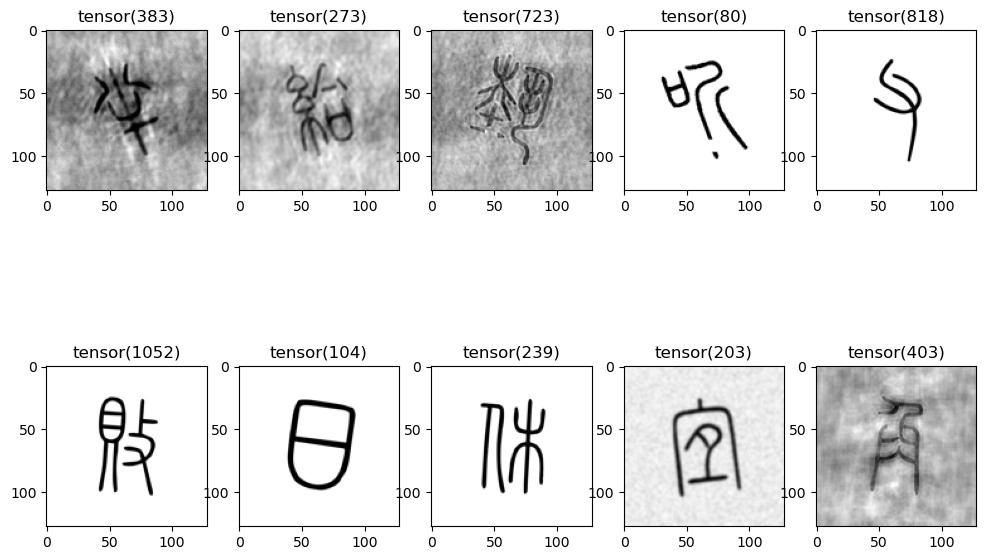

In [13]:
class CharactersDataSet(Dataset):
  """
  This is a custom dataset class.
  """
  def __init__(self, x, y, transform=None):
    self.x = x
    self.y = y
    self.transform = transform

  def __len__(self):
    return self.x.shape[0]

  def __getitem__(self, index):
    # note that this isn't randomly selecting. It's a simple get a single item that represents an x and y
    image = Image.open(self.x.iloc[index]).convert("L")
    label = self.y.iloc[index]-1 # Cuda requires class indexing to start from 0
    
    if self.transform:
        image = self.transform(image)

    return image, label

if not os.path.exists(data_file):
    print('[INFO] Data csv does not exist.')
else:
    data = pd.read_csv(data_file, names=['file_path', 'label'])
    x = data['file_path']
    y = data['label']
    num_classes = np.unique(y)[-1]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=4)
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=4)


    transformation = transforms.Compose([
            transforms.Resize((IMAGE_SIZE,IMAGE_SIZE)),
            transforms.ToTensor(),
    #         transforms.Normalize(mean=MEAN, std=STD),
        ])
    


    train_data_object = CharactersDataSet(x_train, y_train, transformation)
    val_data_object = CharactersDataSet(x_val, y_val, transformation)
    test_data_object = CharactersDataSet(x_test, y_test, transformation)

    train_loader = torch.utils.data.DataLoader(train_data_object,
                                              batch_size=BATCH_SIZE,
                                              shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_data_object,
                                              batch_size=BATCH_SIZE,
                                              shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_data_object,
                                              batch_size=BATCH_SIZE,
                                              shuffle=True)
    
    dataloaders = {'train': train_loader, 'validation': val_loader, 'test': test_loader}
    datasets = {'train': train_data_object, 'validation': val_data_object, 'test': test_data_object}

    # Plot some sample images to test data loading process
    train_features, train_labels = next(iter(train_loader))
    print(f"Feature batch shape: {train_features.size()}")
    print(f"Labels batch shape: {train_labels.size()}")
    indx = 0
    f, ax = plt.subplots(2, 5, figsize=(12, 8))
    for r in range(0, 2):
      for c in range(0, 5):
        img = train_features[indx].squeeze()
        label = train_labels[indx]
        ax[r, c].imshow(transforms.ToPILImage()(img), cmap='gray')
        ax[r, c].set_title(str(label))
        indx+=1

In [14]:
print(num_classes)

1076


### Initialize model

In [15]:
model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False).to(device)

# numFcInputs = model.fc[0].in_features

model.fc = nn.Sequential(
               nn.Linear(2048, 1600),
               nn.ReLU(inplace=True),
               nn.Dropout(0.2),
               nn.Linear(1600, num_classes)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters())

### Visualize model

In [16]:
summary(model, input_size=(1, 128, 128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           3,136
       BatchNorm2d-2           [-1, 64, 64, 64]             128
              ReLU-3           [-1, 64, 64, 64]               0
         MaxPool2d-4           [-1, 64, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]           4,096
       BatchNorm2d-6           [-1, 64, 32, 32]             128
              ReLU-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
             ReLU-10           [-1, 64, 32, 32]               0
           Conv2d-11          [-1, 256, 32, 32]          16,384
      BatchNorm2d-12          [-1, 256, 32, 32]             512
           Conv2d-13          [-1, 256, 32, 32]          16,384
      BatchNorm2d-14          [-1, 256,

In [20]:
def train_model(model, criterion, optimizer, num_epochs=12):
    file_name = f'{MODEL_NAME}_B{BATCH_SIZE}_E{EPOCHS}_I{IMAGE_SIZE}_N{NUM_EXAMPLES}.txt' # make file to store training results
    print(f'[INFO] New file created: {file_name}')
    with open(os.path.join(training_results_dir, file_name), 'w') as f:
        for epoch in range(num_epochs):
            print('Epoch {}/{}'.format(epoch+1, num_epochs))
            f.write('Epoch {}/{}\n'.format(epoch+1, num_epochs))
            print('-' * 10)
            f.write('-' * 10+'\n')

            for phase in ['train', 'validation']:
                if phase == 'train':
                    model.train()
                else:
                    model.eval()

                running_loss = 0.0
                running_corrects = 0

                for inputs, labels in dataloaders[phase]:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    outputs = model(inputs)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                    _, preds = torch.max(outputs, 1)
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)

                epoch_loss = running_loss / datasets[phase].__len__()
                epoch_acc = running_corrects.double() / datasets[phase].__len__()

                print('{} loss: {:.4f}, acc: {:.4f}'.format(phase,
                                                            epoch_loss,
                                                            epoch_acc))
                f.write('{} loss: {:.4f}, acc: {:.4f}\n'.format(phase,
                                                            epoch_loss,
                                                            epoch_acc))
    f.close()
    
    return model

model_trained = train_model(model, criterion, optimizer, num_epochs=EPOCHS)

[INFO] New file created: resnet50_B128_E32_I128_N20192.txt
Epoch 1/32
----------
train loss: 4.0536, acc: 0.2493
validation loss: 6.6273, acc: 0.0610
Epoch 2/32
----------
train loss: 3.4463, acc: 0.3350
validation loss: 6.8202, acc: 0.0729
Epoch 3/32
----------
train loss: 2.9890, acc: 0.4090
validation loss: 7.0999, acc: 0.0711
Epoch 4/32
----------
train loss: 2.5508, acc: 0.4862
validation loss: 7.1794, acc: 0.0755
Epoch 5/32
----------
train loss: 2.2252, acc: 0.5475
validation loss: 7.4638, acc: 0.0824
Epoch 6/32
----------
train loss: 1.9331, acc: 0.5982
validation loss: 7.4272, acc: 0.0798
Epoch 7/32
----------
train loss: 1.6997, acc: 0.6474
validation loss: 7.7141, acc: 0.0858
Epoch 8/32
----------
train loss: 1.3549, acc: 0.7095
validation loss: 7.8797, acc: 0.0832
Epoch 9/32
----------
train loss: 1.2882, acc: 0.7284
validation loss: 7.9393, acc: 0.0856
Epoch 10/32
----------
train loss: 1.1327, acc: 0.7601
validation loss: 8.1195, acc: 0.0840
Epoch 11/32
----------
train l